In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import *
import random

2023-05-11 14:25:37.520053: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 14:25:38.730240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
f = open("partial_data.csv", "r")

x = []
y = []

for line in f.readlines():
    sequence = line.split(",")

    sequence = [int(x) for x in sequence]

    for i in range(len(sequence)-10):
        x.append(sequence[i:i+10])
        y.append(sequence[i+10])

f.close()

x = np.array(x)

y = np.array(y)

In [3]:
# add noise
for i in range(x.shape[0]):
    index = np.random.randint(0, 10)

    new_number = np.random.randint(0, 10)

    # Replace the number at the randomly generated index with the new number.
    x[i,index] = new_number

In [4]:
model = tf.keras.models.load_model('../models/transformer_numbers')

model.evaluate(x, y, verbose=1)

2023-05-11 14:25:42.529726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-11 14:25:42.571064: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-11 14:25:42.571709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

10/10 [==============================] - 3s 20ms/step - loss: 2.8232 - sparse_categorical_accuracy: 0.7033


[2.8232316970825195, 0.70333331823349]

10/10 [==============================] - 1s 9ms/step


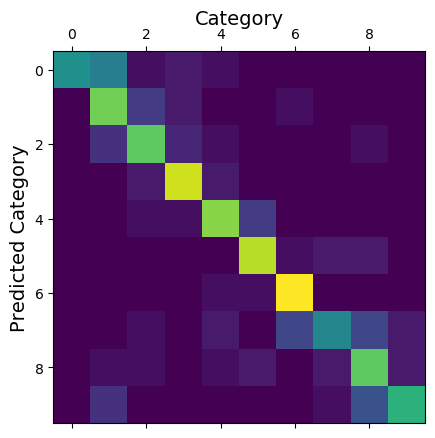

In [5]:
y_pred=np.argmax(model.predict(x), axis=-1)
plot_confusion_matrix(y, y_pred)

In [6]:
model = tf.keras.models.load_model('../models/lstm_numbers')

model.evaluate(x, y, verbose=1)

2023-05-11 14:26:02.415189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-05-11 14:26:02.415320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-05-11 14:26:02.415421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 34ms/step - loss: 1.7530 - sparse_categorical_accuracy: 0.8567


[1.7530393600463867, 0.8566666841506958]

 3/10 [========>.....................] - ETA: 0s

2023-05-11 14:26:06.251191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-11 14:26:06.253738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-11 14:26:06.255484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 30ms/step


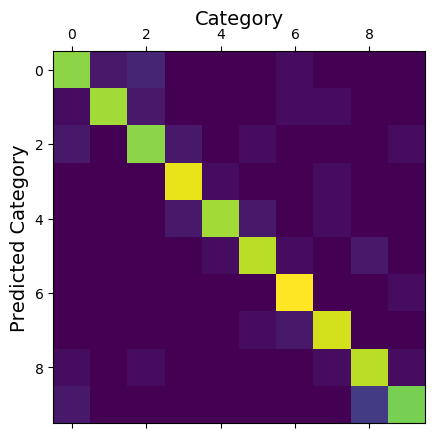

In [7]:
y_pred=np.argmax(model.predict(x), axis=-1)
plot_confusion_matrix(y, y_pred)